In [1]:
from Helpers import *

#Constants
class style:
   BOLD = '\033[1m'
   END = '\033[0m'

/home/keshav/anaconda3/lib/python3.6/site-packages/urllib3/contrib/pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL
/home/keshav/anaconda3/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


# Data reading

We obtain the data from Make America Great Again , which was the election campaign of Trump and the protests against it from 1 source:

* From 2013-2017  we use tweets using *GetOldTweets-python* API, which returns all information about the tweets but the language. Since the number of tweets can be so many, we filter 1000 tweets per 6 hours for the purpose of this analysis. 

###### Make America Great Again (#MAGA) 
#MAGA has 2 facets : people in favour and against it As people against the protest don't normally use #BlackLivesMatter hashtag, because its use is a measure of its  impact and succces we obtain hashtags that are tipically considered used from each of the sides of the protest. We obtain the following hashtags, taking into account that the search is not case sensitive:

* in favour of the protest :  #NotMyPresident , #TheResistance , #Resist , #TakeAKnee
* Against the protest (MAGA): #MAGA #MakeAmericaGreatAgain
Throughtout this notebook we will refer to those hashtags against #MAGA as  #Resist, as it's includes the others. This way, we have tweets from both in favour and against the protest and we can observe the trends and tendencies in each.

We load tweets from both sources mentioned above using the function *read_dataframes*, whose definition can be found in the helpers notebook. The columns of the resulting dataframe are the following:
  
   * id: id of the tweet, converted to int
   * date: with the format year/month/day
   * epoch: timestamp aggregated by day
   * hashes_inside: hashtags found in the tweets
   * hashtag: hashtag used as filter to obtain the tweet
   * user: who tweeted
   * lang: language of the tweet
   * retweets: number of retweets
   * text: of the tweet
   * to: retweet handles inside the tweet
   

** Make America Great Again **

_Reading_

We load all data with the *read_dataframes* function and make columnn header changes to conform to the style with other groupmates, defined in the Helpers notebook, which loads the tweets both from the dataset and the _GetOldTweets_ API.

We obtain all tweets from the database containing the hashtag #makeamericagreatagain or variations with different capitalized letters by filtering by this hashtag in the text. These tweets range from 1st January 2013 to 29th August 2017, the last day captured in the database. There are 763148 tweets, written by 161214 different users, that is, 21% of the tweets are written by different people. 

In [2]:
#Read the tweets
tweet_maga=read_database('maga')
conform_dataframes(tweet_maga,'#maga')
#Sort by date
tweet_maga.sort_values(by='date', inplace =True)
tweet_maga.head()

,date,hashes_inside,to,retweets,text,user,hashtag,epoch
id,,,,,,,,
285901167475707904,2013-01-01 01:12:04.000000,#prom #maga #18th,,0,The only part of this year I'm really looking ...,jess_atthedisco,#maga,1.356999e+09
285907596190298112,2013-01-01 01:37:37.000000,#2013 #18 #maga #car #skiing #singapore #every...,,0,#2013 #18 #maga #car #skiing #singapore #every...,livbroadhead,#maga,1.357001e+09
285908412414435330,2013-01-01 01:40:52.000000,#Avengers #WatchTheThrone #Maga #TheDarkKnight...,,0,#Avengers #WatchTheThrone #Maga #TheDarkKnight...,the_forger,#maga,1.357001e+09
285911143199932416,2013-01-01 01:51:43.000000,#perf #liverpool #maga #bringiton,@Luciieh12 @DanielleJolley_,0,Entering 2013 with @Luciieh12 @DanielleJolley_...,eleanor_vials,#maga,1.357002e+09
285913352490852352,2013-01-01 02:00:29.000000,#slutdrop #maga,,0,Lets get fucking mortal #slutdrop #maga,amymay08,#maga,1.357002e+09


** RESIST **

We also obtain all tweets from others hashtags suchs as __#NOTMYPRESIDENT,#TheResistance , #Resist , #TakeAKnee # normally considered against the #MAGA movement. __ In this case, we can observe that the tweets start on 1 January 2013.  

There are only 687888 tweets from these hashtags.However, 181167 are from different people, which seems to indicate that they were slightly more engaged than in favour of the protest. 

In [3]:
#Read resist tweets
tweet_resist=read_database('antimaga')
conform_dataframes(tweet_resist,'#resist')
tweet_resist.sort_values(by='date', inplace =True) #Sort by date
tweet_resist.head()

,date,hashes_inside,to,retweets,text,user,hashtag,epoch
id,,,,,,,,
285933329017077762,2013-01-01 03:19:52.000000,#TheResistance #FRSHTRB,,2,My whole team bout to smash the scene #TheResi...,GlennWaco,#resist,1.357007e+09
285934424300867584,2013-01-01 03:24:13.000000,#OneOfLifesGreatMysteries #Obama #NotMyPreside...,@MatthewKBurke,3,RT @MatthewKBurke : #OneOfLifesGreatMysteries ...,HopeNChangeFail,#resist,1.357007e+09
285935975379632130,2013-01-01 03:30:24.000000,#theresistance,,0,#theresistance pic.twitter.com/6QXiZBGH,bengleason4360,#resist,1.357007e+09
285938168660910080,2013-01-01 03:39:06.000000,#NotMyPresident #Congress #Obama #FiscalCliff,@sohali2012,0,RT @sohali2012 : BREAKING: Dumbasses have agre...,HopeNChangeFail,#resist,1.357008e+09
285957422978330624,2013-01-01 04:55:37.000000,#theresistance #newyearseve,,0,SPY !!!! #theresistance #newyearseve,jhpch,#resist,1.357013e+09


In [8]:
event=['Trump announces his candidacy',
'Trump is elected. First apparition of #TheResistance and #Resist'
'Halt on the construction of the Dakota Access Pipeline',
'Inauguration of Trump as president', 
'Women’s March ',
'Greenpeace activists hang a 70ft banner that read “RESIST” on a 300ft-high crane outside of the White House',
'Investigation of Russia’s involvement in US elections',
'Trump announces the Muslim Ban',
'Melissa McCarthy as Sean Spicer on SNL',
'Muslim ban rejected by Federal court',
'Michael Flinn resigns',
'FBI confirms that Trump’s team is under investigation for the involvement of Russia in the elections',
'100 days of Trump as president',
'#TakeAKnee is born: Trump insults NFL players who kneels during the national anthem']


date=['2015/06/16',
'2016/11/08',
'2016/12/05',
'2017/01/19',
'2017/01/21',
'2017/01/25',
'2017/01/27',
'2017/02/04',
'2017/02/09',
'2017/02/13',
'2017/03/20',
'2017/04/29',
'2017/09/22']

#Create dataframe
events=pd.DataFrame()
#Add data
events['event']=event
events['date']=pd.to_datetime(date, format='%Y/%m/%d')
events.sort_values(by='date', inplace=True) #Sort by date
events.head()

,event,date
0,Trump announces his candidacy,2015-06-16
1,Trump is elected. First apparition of #TheResi...,2016-11-08
2,Inauguration of Trump as president,2016-12-05
3,Women’s March,2017-01-19
4,Greenpeace activists hang a 70ft banner that r...,2017-01-21


## Success of the protest

We study the success of the protests as the number of tweets and retweets over time. In addition, we also see how many people contributed to the hashtag and in which language.

We first obtain some basic statistics about both sides of the protest.

In [9]:
#Small analysis of data
print(style.BOLD+'#MAGA'+style.END)
l_maga=len(tweet_maga)
print('Number of #maga tweets: ', l_maga)
print('Tweets from {} to {}'.format(tweet_maga['date'].iloc[0], tweet_maga['date'].iloc[-1]))
print('Number of different users tweeting: {},  {}% of the total'.format(len(np.unique(tweet_maga['user'])), 
                                                                        100*len(np.unique(tweet_maga['user']))/l_maga))


print(style.BOLD+'#Resist'+style.END)
n_antimaga=len(tweet_resist)
print('Number of #AllLivesMatter tweets: ', n_antimaga)
print('Tweets from {} to {}'.format(tweet_resist['date'].iloc[0], tweet_resist['date'].iloc[-1]))
print('Number of different users tweeting: {},  {}% of the total'.format(len(np.unique(tweet_resist['user'])), 
                                                                        100*len(np.unique(tweet_resist['user']))/n_antimaga))



#MAGA
Number of #maga tweets:  763148
Tweets from 2013-01-01 01:12:04.000000 to 2017-10-29 01:59:58.000000
Number of different users tweeting: 161214,  21.124866998275564% of the total
#Resist
Number of #AllLivesMatter tweets:  687888
Tweets from 2013-01-01 03:19:52.000000 to 2017-10-29 01:59:47.000000
Number of different users tweeting: 181167,  26.336700160491244% of the total


/data/ADA_project/Milestones/Helpers.py:704: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/data/ADA_project/Milestones/Helpers.py:717: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



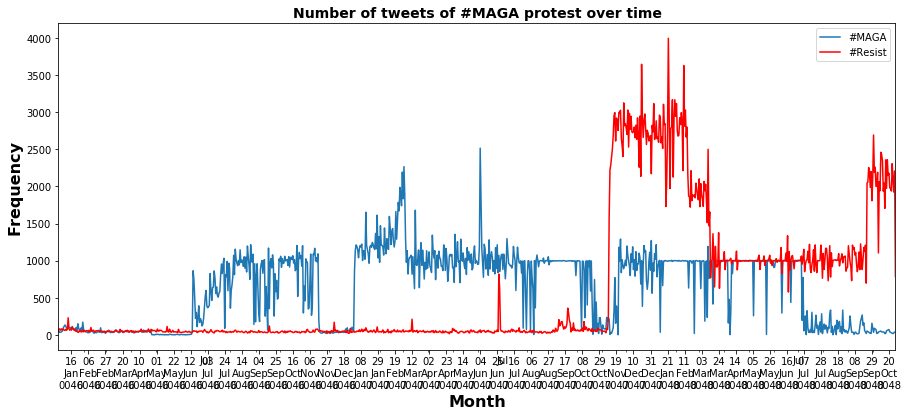

In [12]:
#Static plot
tweet_maga['date']=pd.to_datetime(tweet_maga['date'])
tweet_resist['date']=pd.to_datetime(tweet_resist['date'])
plot_num_tweets(tweet_maga, "#MAGA", data2=tweet_resist, label2="#Resist", date_to='01-01-2015')

In [16]:
#Interactive plot
import plotly
plotly.tools.set_credentials_file(username='shaginhekvs', api_key='NcDuEDhfKPiEkEuKQQqB')
plot_num_tweets_interactive(tweet_maga, "#MAGA", tweet_resist, "#Resist", events=events,date_to='01-01-2015')

/home/keshav/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:224: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/home/keshav/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~shaginhekvs/0 or inside your plot.ly account where it is named 'simple-annotation'


In [ ]:
## Polarization of the hashtags
antitags=['#TAKEAKNEE' '#RESIST', '#THERESISTANCE']
_=cooccurence_hashtag(tweet_maga, antitags, '#MAGA')

In [3]:
def filter_resample(x):
    if(len(x)>0):
        return x.sample(n=1)[0]
    else:
        return ''
    
def filter_before_lda(tweet_df):
    tweet_df['id']=tweet_df.index
    tweet_df.index=pd.to_datetime(tweet_df['date'])
    tweet_df=tweet_df.loc['2016-01-01':'2017-11-30']
    tweet_df=tweet_df['text'].groupby(pd.TimeGrouper(freq='900s')).agg({'text':filter_resample})
    tweet_df=tweet_df[tweet_df.text!='']
    return tweet_df   



In [ ]:
preprocessing_options={'handles':False, 'urls':False}
seed = 42 # reproducibility!
random.seed(seed)
processed_tweets=[preprocess_tweet(tweet, handles=False,urls=False) for tweet in filter_before_lda(tweet_maga).text.values]
ldamodel, dictionary, doc_term_matrix =get_topics_list(processed_tweets, **preprocessing_options)

lda_docs_dict=dict(model=ldamodel,dictionary=dictionary,doc=doc_term_matrix)
pickle.dump(lda_docs_dict,open('./data/lda_docs_dict_maga','wb'))

In [ ]:
lda_docs_dict=pickle.load(open('./data/lda_docs_dict_maga','rb'))
data =  pyLDAvis.gensim.prepare(lda_docs_dict['model'], lda_docs_dict['doc'], lda_docs_dict['dictionary'])
pyLDAvis.display(data)

In [ ]:
#RESIST
processed_tweets=[preprocess_tweet(tweet, handles=False,urls=False) for tweet in filter_before_lda(tweet_resist).text.values]
preprocessing_options={'handles':False, 'urls':False}
seed = 42 # reproducibility!
random.seed(seed)
ldamodel_alm, dictionary_alm, doc_term_matrix_alm =get_topics_list(processed_tweets, **preprocessing_options)

lda_docs_dict=dict(model=ldamodel,dictionary=dictionary,doc=doc_term_matrix)
pickle.dump(lda_docs_dict,open('./lda_docs_dict_antimaga','wb'))



In [ ]:
lda_docs_dict=pickle.load(open('./lda_docs_dict_antimaga','rb'))
data =  pyLDAvis.gensim.prepare(lda_docs_dict['model'], lda_docs_dict['doc'], lda_docs_dict['dictionary'])
pyLDAvis.display(data)

/home/keshav/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



# Sentiment analysis

We study the polarity of the tweets so we can classify them as:
* Positive: if polarity is bigger than 0
* Negative: if polarity is smaller than 0
* Neutral: if polarity is 0

In addition, we also obtain the subjectivity of the tweet which indicates whether the tweet is objective or rational (subjectivity < 0.5); subjective or emotional (subjectivity > 0.5) or neutral (subjectivity=0.5). This allows an analysis of how people react and how emotionally envolved are they.

** MAGA **

We first obtain the polarity and subjectivity and add it to the dataframe for every tweet using the *get_tweet_sentiment* function. 

In [ ]:
#Get setiments
polarity_maga, subj_maga=zip(*map(lambda tweet: get_tweet_sentiment(tweet), tweet_maga.text.values))
tweet_maga['polarity']=polarity_maga
tweet_maga['subj']=subj_maga

pickle.dump(tweet_maga,open('./maga_df_pol_sub','wb'))

In [ ]:
tweet_maga=pickle.load(open('./maga_df_pol_sub','rb'))


In [ ]:
_=plot_type_sentiment('polarity',tweet_maga, 'MAGA', events=events, date_to='1-1-2013')

In [ ]:
_=plot_type_sentiment('subj',tweet_maga, 'MAGA', events=events, date_to='1-1-2013')

In [ ]:
#Get setiments
polarity_maga, subj_maga=zip(*map(lambda tweet: get_tweet_sentiment(tweet), tweet_resist.text.values))
tweet_maga['polarity']=polarity_maga
tweet_maga['subj']=subj_maga

pickle.dump(tweet_resist,open('./antimaga_df_pol_sub','wb'))

In [ ]:
tweet_resist=pickle.load(open('./antimaga_df_pol_sub','rb'))

In [ ]:
_=plot_type_sentiment('polarity',tweet_resist, 'Resist',  events=events, date_to='1-1-2013')

In [ ]:
_=plot_type_sentiment('subj',tweet_resist, 'Resist', events=events, date_to='1-1-2013')

In [ ]:
plot_type_sentiment_interactive('polarity',tweet_maga, 'MAGA', events=events, date_to='1-1-2013')

In [ ]:
plot_type_sentiment_interactive('subj',tweet_maga, 'MAGA', events=events, date_to='1-1-2013')

In [ ]:
plot_type_sentiment_interactive('polarity',tweet_reist, 'Resist', events=events, date_to='1-1-2013')

In [ ]:
plot_type_sentiment_interactive('subj',tweet_resist, 'Resist', events=events, date_to='1-1-2013')

**Comparison of sentiment analysis in favour and against the protest**

We plot both the mean polarity and subjectivity of both groups of the protest aggregated by week, in order to have more consistent trends than by day. In blue we show the #Resist tweets, while #MAGA are in Red. We do not plot the number of tweets consider positive, negative and so on because we consider more informative to know if they are slightly positive (small value of polarity) than the overall numbers

_Polarity_

First, we plot the polarity aggregating by the mean, as the std is small.

In [ ]:
plot_sentiment_tweets('polarity',tweet_resist, 'Resist', tweet_maga, 'MAGA', events=events, metric='median', date_to='1-1-2013')

_Subjectivity_

Given the bigger standard deviations, we use the median to aggregate the subjectivity. We can observe that in the months were the protest was more viral (December and January 2015) the trends from both sides of the protest were similar. However, as time passes the tweets supporting #BlackLivesMatter tend to be more rational, while the ones against are still very emotional. Despite this, overall we can say that for this protest both of the sides tend to be very emotional.


In [ ]:
plot_sentiment_tweets('subj',tweet_resist, 'Resist', tweet_maga, 'MAGA', events=events, metric='median', date_to='1-01-2013')

In [ ]:
plot_sentiment_tweets_interactive('polarity',tweet_resist, 'Resist', tweet_maga, 'MAGA', events=events, metric='median', date_to='1-1-2013')

In [ ]:
plot_sentiment_tweets_interactive('subj',tweet_resist, 'Resist', tweet_maga, 'MAGA', events=events, metric='median', date_to='1-1-2013')